In [2]:
'''%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn'''

import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [3]:
#%pip install kagglehub

In [8]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "games.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "datasnaek/chess",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())


games = df

/var/folders/6r/r_vnyv056nscq3n8__vdvkgc0000gn/T/ipykernel_29291/686038170.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:          id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                             

In [9]:
### exploring how to use python and SQL together
conn = sql.connect(":memory:") 
df.to_sql("games", conn, index=False, if_exists="replace")

# Step 2: Run some SQL queries for EDA

# 1. Total number of games
total_games = pd.read_sql_query("SELECT COUNT(*) as total FROM games;", conn)
print(total_games)


columns_exploration = pd.read_sql_query("SELECT * FROM games limit 1", conn)
print(columns_exploration)

   total
0  20058
         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE      0  1.504210e+12  1.504210e+12     13      outoftime  white   

  increment_code  white_id  white_rating black_id  black_rating  \
0           15+2  bourgris          1500     a-00          1191   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   

                       opening_name  opening_ply  
0  Slav Defense: Exchange Variation            5  


In [30]:
##3 exploring pandas

games = df

games.head() #prints the first 5 rows of the table
games.columns #tells us how many columns are in the table
df.index # index tells us row count and the step each row takes (ie increases by 1)
games.head()



,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
games.info() #tells us data type info for our columns in the table. inckludes number of non-null values per column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
games.describe() # tells us the count, mean, std, quartiles of the data set



,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [28]:
#loc #allows to filter by rows and columns

games.loc[0:15, ["white_rating", 'black_rating']]

,white_rating,black_rating
0,1500,1191
1,1322,1261
2,1496,1500
3,1439,1454
4,1523,1469
5,1250,1002
6,1520,1423
7,1413,2108
8,1439,1392
9,1381,1209


In [32]:
games.sort_values(["turns","white_rating"], ascending=[0,1])

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11554,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13
13859,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13
16386,cZiGllu7,True,1.481753e+12,1.481755e+12,259,draw,draw,15+5,aragon26,1441,lone-wolf,1461,d4 d5 c4 c6 Nc3 Nf6 Bg5 Nbd7 Qc2 Qb6 e3 h6 Bf4...,D10,Slav Defense #2,5
4236,vQq60Hur,True,1.474480e+12,1.474490e+12,255,draw,draw,7+2,manipin,1585,kasparovd0311,1448,e4 e6 Nc3 d5 exd5 exd5 d4 Nf6 Bf4 Be7 Nf3 O-O ...,C00,French Defense: Queen's Knight,3
16645,5ZjOnwjl,True,1.480271e+12,1.480272e+12,226,draw,draw,10+0,chunnev,1817,jhonthoth,1907,e4 e6 Nf3 d5 exd5 exd5 d4 Nf6 Bg5 Be7 Nc3 Be6 ...,C00,French Defense: Knight Variation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13560,LAFV9u5Q,False,1.504442e+12,1.504442e+12,1,outoftime,white,20+10,jerusseust,2438,castlebit,1885,e4,B00,King's Pawn,1
6040,5DsE7SPq,False,1.488130e+12,1.488140e+12,1,outoftime,white,60+60,lance5500,2617,justindong,1500,Nf3,A04,Reti Opening,1
11742,458qPV3q,False,1.503514e+12,1.503514e+12,1,resign,white,10+25,lance5500,2621,antons,1614,d4,A40,Queen's Pawn,1
12679,IgPAcv5b,False,1.496973e+12,1.496973e+12,1,outoftime,white,5+60,lance5500,2621,raulelbueno,1384,d4,A40,Queen's Pawn,1


In [ ]:
for index,row in games.iterrows():
    print(index)
    print(row["opening_name"]) #note syntax for pulling values of specific columns

#looping through the dataset like this defeats the purpose of pandas but is fine for learning


0
Slav Defense: Exchange Variation
1
Nimzowitsch Defense: Kennedy Variation
2
King's Pawn Game: Leonardis Variation
3
Queen's Pawn Game: Zukertort Variation
4
Philidor Defense
5
Sicilian Defense: Mongoose Variation
6
Blackmar-Diemer Gambit: Pietrowsky Defense
7
Nimzowitsch Defense: Kennedy Variation |  Linksspringer Variation
8
Italian Game: Schilling-Kostic Gambit
9
Scandinavian Defense: Mieses-Kotroc Variation
10
Van't Kruijs Opening
11
French Defense: Advance Variation |  Paulsen Attack
12
French Defense: Knight Variation
13
French Defense #2
14
Four Knights Game: Italian Variation
15
Italian Game: Two Knights Defense |  Knight Attack
16
Four Knights Game: Italian Variation
17
Four Knights Game: Italian Variation
18
Philidor Defense #3
19
Queen's Pawn Game
20
Italian Game: Anti-Fried Liver Defense
21
Horwitz Defense
22
Sicilian Defense: Bowdler Attack
23
English Opening: King's English Variation |  Reversed Closed Sicilian
24
Sicilian Defense: Smith-Morra Gambit #2
25
Queen's Pawn G

In [ ]:
## merging and concatenating data

In [37]:
games.loc[games["white_rating"] > 2000, ['white_id',"white_rating"]]

,white_id,white_rating
39,rajuppi,2449
43,rajuppi,2443
48,rajuppi,2436
49,rajuppi,2436
120,chess-brahs,2036
...,...,...
20014,moistvonlipwig,2229
20015,waltersafarian,2162
20016,moistvonlipwig,2236
20017,i9_4_2001,2268


In [58]:
games[games['opening_name'].str.contains("Queen's")]  # this is a regular expression constraint



## Overall white win percent 
import numpy as np

white_wins = games[games['winner'] == 'white']
white_win_percent = len(white_wins) / len(games) * 100

print(f"Overall win percentage for White: {white_win_percent:.2f}%")

games['white_win_percent_overall'] = white_win_percent


games.head()






Overall win percentage for White: 49.86%


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,white_win_percent_overall
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,49.860405
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,49.860405
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,49.860405
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,49.860405
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,49.860405


In [60]:
### adding custom columns to the data set
## per player white win percentage


games['white_win'] = (games['winner'] == 'white').astype(int)

white_win_percent_ind = games.groupby('white_id')['white_win'].mean()*100

games['white_win_percent_individual'] = games['white_id'].map(white_win_percent_ind)


games.head()





,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,white_win_percent_overall,white_win,white_win_percent_individual
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,49.860405,1,100.000000
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,49.860405,0,0.000000
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,49.860405,1,100.000000
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,49.860405,1,100.000000
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,49.860405,1,66.666667


In [62]:
### after running the above code, I realized that it appears some players had a 100% win percentage as white. This indicates to me that there may be some players that only have one game recorded in the database, so I will count the number of times each
# player shows up and only take players with >5 games played

# 1. Count games played as White and Black
games_as_white = games['white_id'].value_counts()
games_as_black = games['black_id'].value_counts()

# 2. Add total games by mapping counts to white_id and black_id
games['white_total_games'] = games['white_id'].map(games_as_white)
games['black_total_games'] = games['black_id'].map(games_as_black)

# 3. Optionally: add total games played (combined)
games['white_and_black_total'] = games['white_total_games'] + games['black_total_games']


games.head()




,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,moves,opening_eco,opening_name,opening_ply,white_win_percent_overall,white_win,white_win_percent_individual,white_total_games,black_total_games,white_and_black_total
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,49.860405,1,100.000000,1,2,3
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,49.860405,0,0.000000,1,1,2
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,49.860405,1,100.000000,1,2,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,...,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,49.860405,1,100.000000,5,4,9
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,...,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,49.860405,1,66.666667,3,4,7


In [65]:
### creating a new dataset that now only has players where they have played as black and white at least 10 times each 


filtered_games = games[
    (games['white_total_games'] >= 10) & (games['black_total_games'] >= 10)
]


filtered_games.head()



filtered_games.info()




<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 39 to 20013
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            360 non-null    object 
 1   rated                         360 non-null    bool   
 2   created_at                    360 non-null    float64
 3   last_move_at                  360 non-null    float64
 4   turns                         360 non-null    int64  
 5   victory_status                360 non-null    object 
 6   winner                        360 non-null    object 
 7   increment_code                360 non-null    object 
 8   white_id                      360 non-null    object 
 9   white_rating                  360 non-null    int64  
 10  black_id                      360 non-null    object 
 11  black_rating                  360 non-null    int64  
 12  moves                         360 non-null    object 
 13  opening

In [ ]:
### from pandas tutorial, just exploring how to filter with strings
games.query('opening_name == "Queen\'s Pawn Game"')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
19,x31mXlvc,False,1.503760e+12,1.503760e+12,25,resign,white,11+0,g-ios,1500,shivangithegenius,1094,d4 d5 h3 Nc6 Nf3 Nf6 Bg5 h6 Bxf6 exf6 e3 Bb4+ ...,D00,Queen's Pawn Game,2
275,HYMGpINp,True,1.503970e+12,1.503970e+12,48,mate,black,8+0,playforpleasure,1776,tabellaria,1587,d4 d5 c3 c5 dxc5 Nc6 b4 a5 b5 Ne5 Qb3 e6 c6 bx...,D00,Queen's Pawn Game,2
460,QYc8zif6,True,1.503080e+12,1.503080e+12,2,outoftime,black,5+5,fischerdipper,1646,hooponopono,1795,d4 d5,D00,Queen's Pawn Game,2
532,faXIXTIb,True,1.503880e+12,1.503880e+12,22,resign,black,15+15,plahbrogan,1273,hill_j,1160,d4 d5 f4 Bf5 e3 Nc6 g4 Be4 c4 Bxh1 cxd5 Bxd5 N...,D00,Queen's Pawn Game,2
772,0pV2ZEKN,True,1.499950e+12,1.499950e+12,28,resign,black,5+5,ss96,2083,amir2002zzz,2415,d4 d5 c3 c5 dxc5 e5 Qd3 e4 Qd4 Nc6 Qa4 Bxc5 b4...,D00,Queen's Pawn Game,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18282,BiM9Wrvr,True,1.502479e+12,1.502479e+12,32,mate,black,10+0,stitch_13,1286,bet,1730,d4 d5 b3 c5 Nf3 Bg4 h3 Bxf3 gxf3 Nf6 Bg2 Nc6 d...,D00,Queen's Pawn Game,2
18299,sBSbYjw9,True,1.501365e+12,1.501365e+12,124,draw,draw,10+0,stitch_13,1204,itaembu123,1170,d4 d5 c3 e6 Be3 Bd6 Na3 Nf6 Nb5 O-O Nxd6 cxd6 ...,D00,Queen's Pawn Game,2
18535,cd6t8kvo,True,1.485364e+12,1.485364e+12,68,resign,white,5+5,green_star,1716,sagansaxo,1617,d4 d5 a3 Nf6 e3 e6 Nf3 Nc6 c4 b6 Nc3 Ba6 b4 Bx...,D00,Queen's Pawn Game,2
18624,iBX5kpPy,True,1.466930e+12,1.466932e+12,69,outoftime,white,15+0,kristall63,1803,anakgreget,1723,d4 d5 c3 Nf6 Bf4 Bf5 e3 Nbd7 Qb3 Rb8 Be2 e6 Nf...,D00,Queen's Pawn Game,2


In [ ]:
### jumping into sklearn
## answering the question does white win % increase as rating climbs? 

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


y = filtered_games.white_win_percent_individual
x = filtered_games[['white_rating']]

linear_model = LinearRegression().fit(x,y)

linear_model
linear_model.coef_ #.03752
linear_model.intercept_ #-11.89


linear_model.predict(x)

r2_score(
    y_true = y,
    y_pred = linear_model.predict(x)
) #.23924 low r2 value indicates that there is high variance in the data set



0.23924748077618596

/var/folders/6r/r_vnyv056nscq3n8__vdvkgc0000gn/T/ipykernel_29291/1215979459.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


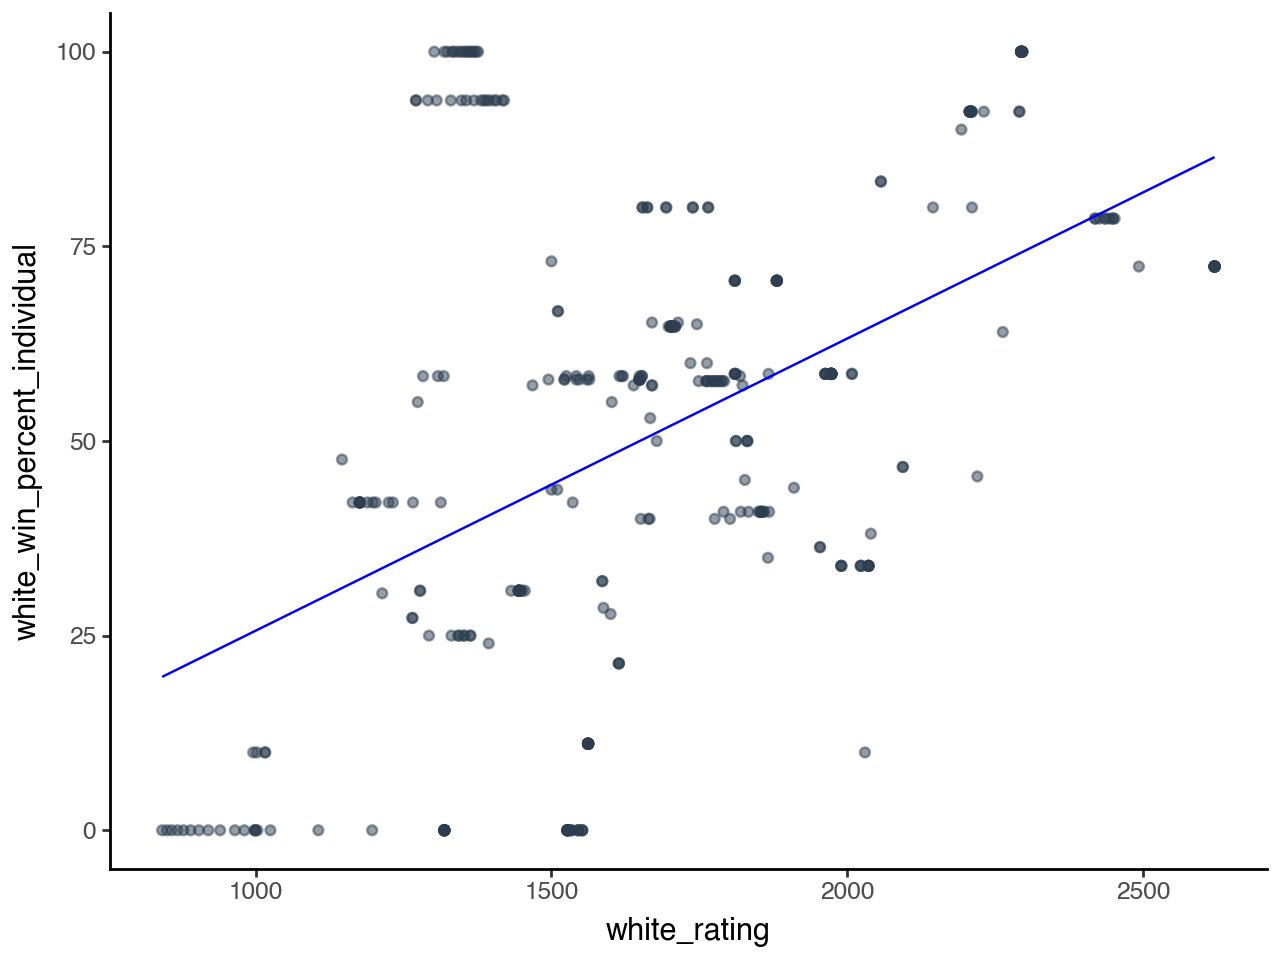

In [89]:
### visualization!!


from plotnine import ggplot, aes, geom_point, geom_line
from plotnine.themes import theme_classic



filtered_games['predicted_win_percent'] = linear_model.predict(x)

ggplot(aes('white_rating','white_win_percent_individual'),filtered_games) \
    +geom_point(alpha=.5, color = "#2c3e50")\
    +geom_line(aes(y = 'predicted_win_percent'), color = 'blue')\
    +theme_classic()

 